# 2. The actual mutual fund’s stock composition could be different in 2021. Find information on how the best mutual fund adjusted their holdings in 2021. Briefly discuss (1) what the fund manager did increase or decrease which stocks/sectors, (2) whether their decisions improved the fund performance (compared to doing nothing), and (3) any reasons of that from their own words? (i.e., news articles, from their report to investors…etc.) 
a.	It is sufficient to have changes of weights at only one time point in 2021 (any one time point is fine).<br>
b.	Using the time point of new portfolio weights, calculate and compare the risk-return of the original portfolio vs the new portfolio. <br>
c.	If there are too many stocks, you can focus on the top 30 stocks again


In [31]:
import pandas as pd
import numpy as np
import math
import yfinance as yf
from pandas_datareader.data import DataReader
from pypfopt import expected_returns, risk_models
from matplotlib import pyplot as plt

top_30 = ['SYNA', 'MRVL', 'SGH', 'ENPH', 'JBL', 'CRUS', 'MCHP', 'AEIS', 'MTSI', 'AMAT', 'NVDA', 'ON', 'TTMI', 'SMTC', 'AVGO', 'XLNX', 'TSM', 'IIVI', 'QCOM', 'NXPI', 'FLEX', 'DIOD', 'AMD', 'MXL', 'ADI', 'INTC', 'TXN', 'LRCX', 'MU', 'OLED']

## Stock composition before 2021 (top 30 stocks)

In [2]:
original_portfolio = pd.read_csv('original_weights_best.csv')
#original_portfolio['Security\'s Percentage of the Total Net Assets'] = np.round(original_portfolio['Security\'s Percentage of the Total Net Assets'],3)/100
original_portfolio.index = original_portfolio['Ticker Symbol Given by the Exchange']
del original_portfolio['Ticker Symbol Given by the Exchange']
original_portfolio = original_portfolio.loc[top_30,]

# normalize top 30 weights
original_portfolio['Security\'s Percentage of the Total Net Assets'] = (original_portfolio['Security\'s Percentage of the Total Net Assets']/original_portfolio['Security\'s Percentage of the Total Net Assets'].sum())

original_portfolio = original_portfolio.sort_values(by="Security's Percentage of the Total Net Assets", ascending=False)
original_portfolio

,Security's Percentage of the Total Net Assets,Number of the Security's Shares,Market Value of the Security as of eff_dt,Name of the Security Held
Ticker Symbol Given by the Exchange,,,,
NVDA,0.196711,1891192.0,9.875805e+08,NVIDIA CORP
QCOM,0.069500,2288988.0,3.487044e+08,QUALCOMM INC
NXPI,0.062881,1983488.0,3.153944e+08,N X P SEMICONDUCTORS N V
MU,0.060192,4015660.0,3.018973e+08,MICRON TECHNOLOGY INC
MRVL,0.055538,5868093.0,2.789691e+08,MARVELL TECHNOLOGY GROUP LTD
AMD,0.054711,2994500.0,2.746256e+08,ADVANCED MICRO DEVICES INC
MCHP,0.049436,1794837.0,2.478849e+08,MICROCHIP TECHNOLOGY INC
AVGO,0.048506,555550.0,2.432476e+08,BROADCOM INC
XLNX,0.047988,1699866.0,2.409900e+08,XILINX INC


## Stock composition in 2021 (top 30 stocks)
Use the portfolio holdings from the excel file, at 31/03/2021

In [3]:
portfolio_holdings = pd.read_excel("Portfolio Holdings for Project.xlsx")
#portfolio_holdings = portfolio_holdings[portfolio_holdings['Ticker Symbol Given by the Exchange'].isin(new_portfolio_stocks)]
new_portfolio = portfolio_holdings[portfolio_holdings['Period End Date, as Reported'] =='31/03/2021']
new_portfolio = new_portfolio[new_portfolio['Portfolio Identifier'].isin([1000888,1022448])]

# get top 30 
new_portfolio = new_portfolio.sort_values(by="Security's Percentage of the Total Net Assets", ascending=False)
#IPHI and 005930 has no stock data, so we will take top 32 and drop these 2
new_portfolio = new_portfolio.head(32)
new_portfolio.index=new_portfolio['Ticker Symbol Given by the Exchange']
new_portfolio = new_portfolio.drop(columns=['Portfolio Identifier',
                                                              'Period End Date, as Reported',
                                                              'Ticker Symbol Given by the Exchange'])
new_portfolio = new_portfolio.drop(index=['IPHI','005930'])
# normalize top 30 weights
new_portfolio['Security\'s Percentage of the Total Net Assets'] = (new_portfolio['Security\'s Percentage of the Total Net Assets']/new_portfolio['Security\'s Percentage of the Total Net Assets'].sum())
new_portfolio

,Security's Percentage of the Total Net Assets,Number of the Security's Shares,Market Value of the Security as of eff_dt,Name of the Security Held
Ticker Symbol Given by the Exchange,,,,
NVDA,0.188356,1982592.0,1.058565e+09,NVIDIA CORP
MU,0.075446,4807560.0,4.240749e+08,MICRON TECHNOLOGY INC
NXPI,0.075135,2097688.0,4.223485e+08,N X P SEMICONDUCTORS N V
LRCX,0.061125,577673.0,3.438541e+08,LAM RESH CORP
INTC,0.060814,5339242.0,3.417115e+08,INTEL CORP
ON,0.051681,6976640.0,2.902980e+08,ON SEMICONDUCTOR CORP
MRVL,0.051474,5903739.0,2.891651e+08,MARVELL TECHNOLOGY GROUP LTD
MCHP,0.050747,1836737.0,2.850983e+08,MICROCHIP TECHNOLOGY INC
QCOM,0.049502,2097888.0,2.781590e+08,QUALCOMM INC


## Data
Get financial data of all the stocks in the old and new portfolio, from 2021-03-31 to 2021-10-31

In [4]:
all_stocks = list(set(original_portfolio.index).union(set(new_portfolio.index)))
all_stocks

['ENPH',
 'NXPI',
 'DIOD',
 'KLAC',
 'MCHP',
 'INTC',
 'AEIS',
 'IIVI',
 'TTMI',
 'OLED',
 'TXN',
 'NVMI',
 'JBL',
 'CDNS',
 'ARRY',
 'CRUS',
 'MRVL',
 'AVGO',
 'ADI',
 'QCOM',
 'AOSL',
 'SMTC',
 'SYNA',
 'AMD',
 'MTSI',
 'SGH',
 'XLNX',
 'ON',
 'MXL',
 'MPWR',
 'NVDA',
 'MU',
 'TER',
 'LRCX',
 'TSM',
 'AMAT',
 'FLEX']

In [5]:
all_data = yf.download(all_stocks,start='2021-03-31',end= '2021-10-31', progress=False)
all_data_adj_close = all_data['Adj Close']
simple_returns = pd.DataFrame(index=all_data_adj_close.index, columns = all_data_adj_close.columns)
log_returns = pd.DataFrame(index=all_data_adj_close.index, columns = all_data_adj_close.columns)
for ticker in all_data_adj_close.columns:
    prev = all_data_adj_close[ticker].shift(1)
    
    log_returns[ticker] = np.log(all_data_adj_close[ticker]/prev)
    simple_returns[ticker] = (all_data_adj_close[ticker]/prev) - 1
    
log_returns = log_returns.dropna()
simple_returns = simple_returns.dropna()

simple_returns

,ADI,AEIS,AMAT,AMD,AOSL,ARRY,AVGO,CDNS,CRUS,DIOD,...,ON,QCOM,SGH,SMTC,SYNA,TER,TSM,TTMI,TXN,XLNX
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,0.016185,0.030100,0.053960,0.032895,0.033829,0.020883,0.016442,0.046764,0.024653,0.018497,...,0.043642,0.019061,0.047576,0.027550,0.033898,0.049327,0.027896,0.000690,0.016403,0.029925
2021-04-01,0.034176,0.068975,0.059281,0.032994,0.055046,0.006707,0.026507,0.032849,0.033259,0.034820,...,0.030762,0.039219,0.054976,0.035652,0.020086,0.058596,0.055123,0.030345,0.016244,0.048023
2021-04-05,0.019391,0.031105,0.010811,0.004193,0.013623,-0.058294,0.026326,0.030956,0.000342,0.014161,...,0.026580,0.018434,0.019156,0.008396,0.021934,0.030044,-0.002404,0.010040,0.025357,0.006777
2021-04-06,-0.010888,-0.006565,-0.024537,0.000123,-0.000286,0.036081,-0.009438,-0.016521,-0.010497,-0.013128,...,-0.010447,-0.016176,-0.015562,-0.015126,-0.014097,-0.002261,-0.016546,-0.009278,-0.011882,-0.002524
2021-04-07,-0.013976,-0.015643,-0.002866,0.009332,-0.048627,0.007511,-0.002914,-0.006274,-0.008879,-0.042327,...,-0.014689,0.009923,0.119893,-0.018458,-0.018106,-0.004533,-0.020827,-0.006689,-0.007709,0.009816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,0.011770,0.007632,-0.001251,0.021198,0.045283,0.015625,0.012922,0.003658,-0.011212,0.021496,...,0.005438,0.002355,0.032491,0.026501,0.009339,0.009990,-0.005165,0.008929,0.005676,0.015760
2021-10-26,-0.003545,-0.006292,-0.027696,0.004658,-0.012335,-0.019780,0.022602,0.033220,0.004914,-0.002126,...,-0.023367,0.000076,-0.009518,0.004490,-0.003567,-0.018162,0.004752,0.009587,-0.016084,-0.019565
2021-10-27,-0.052368,-0.006098,0.001212,-0.005288,-0.008833,0.025785,-0.020155,-0.045278,0.007021,-0.003728,...,-0.013070,-0.005609,-0.006080,0.010305,0.014936,0.068780,-0.003766,-0.006574,-0.050157,0.052188


## For Best Portfolio (before adjustment)

In [6]:
original_portfolio_returns = simple_returns[top_30]
original_portfolio_returns

,SYNA,MRVL,SGH,ENPH,JBL,CRUS,MCHP,AEIS,MTSI,AMAT,...,FLEX,DIOD,AMD,MXL,ADI,INTC,TXN,LRCX,MU,OLED
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,0.033898,0.034862,0.047576,0.076760,0.013209,0.024653,0.034042,0.030100,0.015934,0.053960,...,0.027497,0.018497,0.032895,0.040929,0.016185,0.003607,0.016403,0.039612,0.019297,0.034517
2021-04-01,0.020086,0.013883,0.054976,0.003268,0.015529,0.033259,0.031890,0.068975,0.009307,0.059281,...,0.002185,0.034820,0.032994,0.072476,0.034176,0.008594,0.016244,0.074021,0.047614,0.005786
2021-04-05,0.021934,0.028393,0.019156,-0.081566,0.013781,0.000342,0.022788,0.031105,0.022883,0.010811,...,-0.002180,0.014161,0.004193,-0.004651,0.019391,0.030829,0.025357,0.033631,0.014500,0.022634
2021-04-06,-0.014097,-0.004308,-0.015562,0.056887,-0.005587,-0.010497,-0.018801,-0.006565,-0.011686,-0.024537,...,0.010923,-0.013128,0.000123,-0.027488,-0.010888,-0.014728,-0.011882,-0.012591,-0.002773,-0.005872
2021-04-07,-0.018106,-0.009636,0.119893,-0.050089,-0.004120,-0.008879,-0.006408,-0.015643,-0.018750,-0.002866,...,-0.010805,-0.042327,0.009332,-0.016393,-0.013976,0.010525,-0.007709,0.009656,0.005027,-0.005576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,0.009339,0.020510,0.032491,0.015450,0.009737,-0.011212,0.007979,0.007632,0.017296,-0.001251,...,0.014462,0.021496,0.021198,0.013429,0.011770,-0.001011,0.005676,-0.008568,0.018516,0.000634
2021-10-26,-0.003567,0.000887,-0.009518,-0.033272,-0.011090,0.004914,-0.026517,-0.006292,-0.021585,-0.027696,...,-0.011616,-0.002126,0.004658,-0.020903,-0.003545,-0.022870,-0.016084,-0.005489,0.002618,0.002939
2021-10-27,0.014936,-0.000443,-0.006080,0.246512,-0.016740,0.007021,-0.019244,-0.006098,-0.000907,0.001212,...,-0.023504,-0.003728,-0.005288,-0.014106,-0.052368,-0.008078,-0.050157,0.008526,-0.010154,-0.007701


In [7]:
# Using this time period, calculate mean historical return
original_portfolio_mu = expected_returns.mean_historical_return(original_portfolio_returns, returns_data=True)
original_portfolio_expected_return = 0
for ticker in original_portfolio_mu.index:
    expected_return = original_portfolio_mu[ticker]
    weight = original_portfolio.loc[ticker,"Security's Percentage of the Total Net Assets"]
    original_portfolio_expected_return += expected_return * weight
print(f"The expected return of the portfolio is: {original_portfolio_expected_return}")

The expected return of the portfolio is: 0.6588697146165774


In [8]:
original_portfolio_S = risk_models.sample_cov(original_portfolio_returns,returns_data=True)
# do the W'CW thing
original_portfolio_weights = original_portfolio["Security's Percentage of the Total Net Assets"]
original_portfolio_weights = np.array(original_portfolio_weights.values)
wc = np.matmul(original_portfolio_weights.T,original_portfolio_S)
original_portfolio_wcw = np.matmul(wc,original_portfolio_weights)
original_portfolio_sd = math.sqrt(original_portfolio_wcw)
print(f"The expected variance of the portfolio is: {original_portfolio_wcw}")

The expected variance of the portfolio is: 0.06291530435476227


In [9]:
# assume risk free rate is 0.01 (from midterm report)
rf = 0.01
original_portfolio_sharpe = (original_portfolio_expected_return - rf) / original_portfolio_sd
print(f"The portfolio Sharpe Ratio is: {original_portfolio_sharpe}")

The portfolio Sharpe Ratio is: 2.5868982880634834


## For new portfolio (after adjustment)

In [10]:
new_portfolio_returns = simple_returns[new_portfolio.index]
new_portfolio_returns

,NVDA,MU,NXPI,LRCX,INTC,ON,MRVL,MCHP,QCOM,AVGO,...,ADI,DIOD,MTSI,MPWR,AEIS,SYNA,FLEX,MXL,ARRY,AOSL
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-31,0.037019,0.019297,0.018051,0.039612,0.003607,0.043642,0.034862,0.034042,0.019061,0.016442,...,0.016185,0.018497,0.015934,0.030999,0.030100,0.033898,0.027497,0.040929,0.020883,0.033829
2021-04-01,0.034724,0.047614,0.033476,0.074021,0.008594,0.030762,0.013883,0.031890,0.039219,0.026507,...,0.034176,0.034820,0.009307,0.040514,0.068975,0.020086,0.002185,0.072476,0.006707,0.055046
2021-04-05,0.012725,0.014500,0.031815,0.033631,0.030829,0.026580,0.028393,0.022788,0.018434,0.026326,...,0.019391,0.014161,0.022883,0.028733,0.031105,0.021934,-0.002180,-0.004651,-0.058294,0.013623
2021-04-06,-0.009008,-0.002773,-0.008337,-0.012591,-0.014728,-0.010447,-0.004308,-0.018801,-0.016176,-0.009438,...,-0.010888,-0.013128,-0.011686,-0.009363,-0.006565,-0.014097,0.010923,-0.027488,0.036081,-0.000286
2021-04-07,0.020344,0.005027,-0.003617,0.009656,0.010525,-0.014689,-0.009636,-0.006408,0.009923,-0.002914,...,-0.013976,-0.042327,-0.018750,-0.003791,-0.015643,-0.018106,-0.010805,-0.016393,0.007511,-0.048627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-25,0.019361,0.018516,0.001801,-0.008568,-0.001011,0.005438,0.020510,0.007979,0.002355,0.012922,...,0.011770,0.021496,0.017296,0.023212,0.007632,0.009339,0.014462,0.013429,0.015625,0.045283
2021-10-26,0.066952,0.002618,-0.020670,-0.005489,-0.022870,-0.023367,0.000887,-0.026517,0.000076,0.022602,...,-0.003545,-0.002126,-0.021585,0.000976,-0.006292,-0.003567,-0.011616,-0.020903,-0.019780,-0.012335
2021-10-27,-0.010762,-0.010154,-0.019067,0.008526,-0.008078,-0.013070,-0.000443,-0.019244,-0.005609,-0.020155,...,-0.052368,-0.003728,-0.000907,0.003210,-0.006098,0.014936,-0.023504,-0.014106,0.025785,-0.008833


In [11]:
# Using this time period, calculate mean historical return
new_portfolio_mu = expected_returns.mean_historical_return(new_portfolio_returns, returns_data=True)
new_portfolio_expected_return = 0
for ticker in new_portfolio_mu.index:
    expected_return = new_portfolio_mu[ticker]
    weight = new_portfolio.loc[ticker,"Security's Percentage of the Total Net Assets"]
    new_portfolio_expected_return += expected_return * weight
print(f"The expected return of the portfolio is: {new_portfolio_expected_return}")

The expected return of the portfolio is: 0.5740923765817033


In [12]:
new_portfolio_S = risk_models.sample_cov(new_portfolio_returns,returns_data=True)
# do the W'CW thing
new_portfolio_weights = new_portfolio["Security's Percentage of the Total Net Assets"]
new_portfolio_weights = np.array(new_portfolio_weights.values)
wc = np.matmul(new_portfolio_weights.T,new_portfolio_S)
new_portfolio_wcw = np.matmul(wc,new_portfolio_weights)
new_portfolio_sd = math.sqrt(new_portfolio_wcw)
print(f"The expected variance of the portfolio is: {new_portfolio_wcw}")

The expected variance of the portfolio is: 0.060228973074155194


In [13]:
# assume risk free rate is 0.01 (from midterm report)
rf = 0.01
new_portfolio_sharpe = (new_portfolio_expected_return - rf) / new_portfolio_sd
print(f"The portfolio Sharpe Ratio is: {new_portfolio_sharpe}")

The portfolio Sharpe Ratio is: 2.2985158417242846


# Some pie charts to see proportion by industry

In [17]:
new_portfolio.index

Index(['NVDA', 'MU', 'NXPI', 'LRCX', 'INTC', 'ON', 'MRVL', 'MCHP', 'QCOM',
       'AVGO', 'TXN', 'AMD', 'AMAT', 'TER', 'CRUS', 'KLAC', 'JBL', 'CDNS',
       'XLNX', 'NVMI', 'ADI', 'DIOD', 'MTSI', 'MPWR', 'AEIS', 'SYNA', 'FLEX',
       'MXL', 'ARRY', 'AOSL'],
      dtype='object', name='Ticker Symbol Given by the Exchange')

In [18]:
# categorize by industry
orig_semic = ['NVDA', 'QCOM', 'NXPI','MU', 'MRVL','AMD','MCHP','AVGO','XLNX','LRCX','ON',
        'INTC','TXN','AMAT','CRUS','ADI','OLED','TSM', 'DIOD','MTSI', 'MXL','SMTC','SYNA','SGH']
orig_others = ['ENPH','JBL','IIVI', 'AEIS','TTMI','FLEX']

new_semic = ['NVDA','MU','NXPI','LRCX','INTC','ON','MRVL','MCHP','QCOM','AVGO','TXN','AMD',
            'AMAT','TER','CRUS','KLAC','XLNX','NVMI','ADI','DIOD','MTSI','MPWR','SYNA','MXL','AOSL']
new_others = ['JBL','CDNS','AEIS','FLEX','ARRY']


In [21]:
new_portfolio.columns

Index(['Security's Percentage of the Total Net Assets',
       'Number of the Security's Shares',
       'Market Value of the Security as of eff_dt',
       'Name of the Security Held'],
      dtype='object')

In [53]:
new_portfolio_by_industry = pd.DataFrame(new_portfolio["Security's Percentage of the Total Net Assets"],
                                        index =new_portfolio.index)
for tx in new_semic:
    new_portfolio_by_industry.loc[tx,'industry'] = 'Semiconductors'
for tx in new_others:
    new_portfolio_by_industry.loc[tx,'industry'] = 'Others'
new_portfolio_by_industry.columns = ['Weight','Industry']
new_semiconductor_weight = new_portfolio_by_industry[new_portfolio_by_industry['Industry'] == 'Semiconductors']['Weight'].sum()
new_semiconductor_weight


0.9499792408012571

In [55]:
original_portfolio_by_industry = pd.DataFrame(original_portfolio["Security's Percentage of the Total Net Assets"],
                                        index =original_portfolio.index)
for tx in orig_semic:
    original_portfolio_by_industry.loc[tx,'industry'] = 'Semiconductors'
for tx in orig_others:
    original_portfolio_by_industry.loc[tx,'industry'] = 'Others'
original_portfolio_by_industry.columns = ['Weight','Industry']
orig_semiconductor_weight = original_portfolio_by_industry[original_portfolio_by_industry['Industry'] == 'Semiconductors']['Weight'].sum()
orig_semiconductor_weight

0.9249146816179736

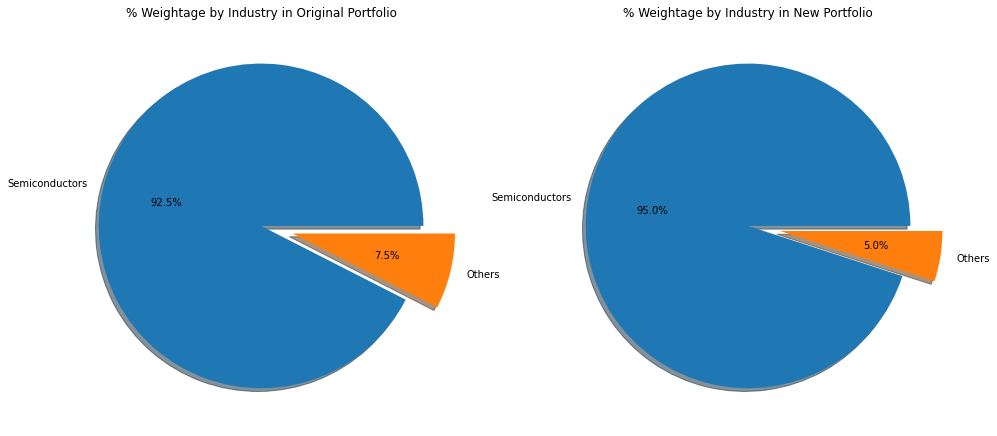

In [63]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,8))
ax1.pie((orig_semiconductor_weight, 1-orig_semiconductor_weight), labels=('Semiconductors','Others'),
       autopct='%1.1f%%', explode = (0,0.2), shadow=True)
ax2.pie((new_semiconductor_weight, 1-new_semiconductor_weight), labels=('Semiconductors','Others'),
       autopct='%1.1f%%', explode = (0,0.2), shadow=True)
ax1.set_title("% Weightage by Industry in Original Portfolio")
ax2.set_title("% Weightage by Industry in New Portfolio")
plt.show()